##  A Monte Carlo test for change in Tuatara sex ratios over time

In the real Tuatara research paper, the authors were not really interested in whether tuatara sex ratios were signficantly different from 50% (as we tested above). Instead, they had measured sex ratios over many years, and wanted to know if the sex ratio was increasing over time. 

Let's try answering that question using the process from above. Our final Monte Carlo function will be the same, but our simulation and effect size calculations will be different because our statistical question is different.

To answer this question, let's assume we have the observed percentage of male Tuatara from many observations over time. We would then like to figure out if the observed percentage of male Tuatara from later timepoints was systematically greater than that from earlier timepoints. If so it might indicate that temperature change, perhaps due to global warming, was affecting the sex ratios of our tuatara, which might have negative consequences for efforts to conserve them. 

Here's an example of how that data looks:

In [3]:
percent_male_data = [67.7,60.0,55.6,60.8,61.9,57.6,73.7,67.4,58.3,68.9,68.1,67.7,66.7,67.6,63.2,61.7,73.6,73.8,75.4,67.2,
71.0]
from matplotlib.pyplot import scatter,show,ylabel,xlabel
scatter(x = range(len(percent_male_data)), y = percent_male_data)
ylabel("Percentage Males")
xlabel("Obsevation Timepoint")
show()

<Figure size 640x480 with 1 Axes>

Let's run through our steps:

- State the hypothesis we wish to test

We want to test the null hypothesis that the that the sex ratio has not been increasing over time. We can do so by testing the null hypothesis that the order of the sex ratio observations does not affect the sex ratio 

- State how we will calculate effect size and calculate our observed effect size

In this case our calculation of effect size might be a little bit more involved than in the previous example. If we already knew some statistics, we might want to test the effect size from spearman regression (regression on ranks). Indeed Spearman regression would directly answer our question. In a real research application we would stop here to read about Spearman regression and use that standard solution to this problem. However, to illustrate the power of Monte Carlo methods let's assume for a moment  that you've never heard of Spearman regression, and indeed regression methods had never been invented. 

How could we measure whether the sex ratio is increasing over time? We could surely brainstorm several measures. Here's one example: we might reason that if the sex ratio were always increasing, each observation should show a higher sex ratio than the previous one. Therefore we might come up with the idea of measuring effect size as the percentage of observations for which the previous observation was lower (not counting the 0th observation).

Again, this is not a 'standard' measure of effect size. Using a Monte Carlo simulation, however, we can still get a valid p-value for this ideosyncratic way of framing our question.

To make sure we understand our measure of effect size, let's calculate it for our observed data. By my count we have 21 observations, and of those 10 are as high or higher than the previous observation. We want to know the chances of seeing that many year-to-year increases if there was no trend over time.

- State how we will calculate a p-value using a Monte Carlo test

In many separate trials, we will simulate data that would reflect a *random* association between sex ratio and time. We can do this be randomly reordering our data on the percentage of males. Since a random order of observations will by definition imply we aren't getting more males over time, this procedure simulates our null hypothesis. For each random trial, we will calculate how many observations exceed the previous year's value. 

- Write code for simulating the event we want to study

To simulate a random association between the percentage of males and the order or our observations - as our null hypothesis specifies - we can simply scramble the order of our observations randomly. The shuffle() function in the random module is a good way to do this.



In [4]:
from copy import copy
from random import shuffle

def simulate_random_order(data = percent_male_data):
    """Return a shuffled version of the data"""
    #Make a copy so we don't shuffle the original list!
    simulated_data = copy(data)
    shuffle(simulated_data)
    return simulated_data

Let's try out our random simulation code to get a sense of how the data might look if they were random with respect to time:

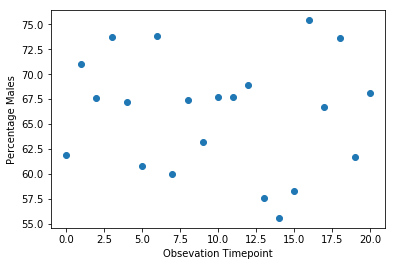

In [5]:
shuffled_data = simulate_random_order(percent_male_data)
scatter(x = range(len(shuffled_data)), y = shuffled_data)
ylabel("Percentage Males")
xlabel("Obsevation Timepoint")
show()

- Write code for calculating an effect size from the simulation. 

We want a function that takes our list of observations of the percentage of males, and calculates how often an observed percentage of male tuatara was as large or larger than the previous one.

In [6]:
from scipy.stats import rankdata #converts numbers to ranks

def calc_effect_size_by_rank_difference(percent_males=percent_male_data):

    rank_data = rankdata(percent_males)
    #Note that the ranks from scipy.stats's rank function count from 1 up.
    total_difference = 0
    total_maximum_difference = 0
    for i,x in enumerate(percent_males):
        
        #If the data were purely increasing, 
        #the rank of each observed value would just be
        #it's order in the observations 
        #(plus 1 since ranks count from 1 not 0)
        expected_rank = i + 1
        
        #A measure of how different from perfect increase
        #our data are can be found by taking the difference
        #in the real vs. expected rank
        difference = abs(rank_data[i] - expected_rank)
        print("rank difference:",difference)
        #to keep our effect size bounded between 0 and 1, we may wish to
        #normalize by the maximum possible rank difference (either to 0 or the highest rank
        maximum_difference = max([min(abs((rank_data)- expected_rank),abs(rank_data[i]-max(rank_data)))])
        print("maximum rank difference:",maximum_difference)
            
        total_difference += difference
        total_maximum_difference += maximum_difference                        
    
    #We want higher effect sizes to represent more *similar* results, so therefore we
    #want to calculate the biggest possible differnce, and normalize by it
    similarity = 1.0 - (total_difference/total_maximum_difference)
    print("Similarity between rank percent males and rank time:",similarity)
    return similarity
    

- Write code for running many simulations, calculating effect sizes, and computing a Monte Carlo p value for our observed effect size.

We have already written a Monte Carlo test. It can be resused as long as we have a **simulation function** that can be called to simulate data under our null hypothesis, and an **effect size** function that can take the data generated by our simulation function and calculate an effect size. Finally, we also need to know our observed effect size. Let's try running our Monte Carlo test:


In [7]:
observed_effect_size = calc_effect_size_by_rank_difference(percent_male_data)
print("Observed effect size:",observed_effect_size)

p = monte_carlo(simulation_fn = simulate_random_order,
  effect_size_fn = calc_effect_size_by_rank_difference,
  observed_effect_size = observed_effect_size) 
print("Monte Carlo p value:",p)

rank difference: 12.5


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Exercises

- **Modify the Monte Carlo simulation of sex ratio significance to account for unequal capture rates**.  When conducting our Monte Carlo test for an even sex ratio in Tuatara, we assumed that male and female Tuatara were captured at equal rates. [Herrel *et al.* 2010](https://academic.oup.com/biolinnean/article/100/2/287/2450663) measured the length and bite force of male and female Tuatara and found that male Tuatara on average weighted 434.8 g while female Tuatara on average weighed 272.7 g. Let us assume for a moment that the chances of observing a male vs. female Tuatara are proportional to their mass, with more massive Tuatara's being easier to spot. (The details of this assumption are probably unrealistic, but hopefully the overall idea will still be illustrative).   If our observation were correct, then a true 50:50 sex ratio of Tuatara might result in an *observed* sex ratio that included more males (because they are, under our assumption, easier to spot). Specifically we'd expect to observe about 61.5% males even if the true sex ratio were 50:50. Modify the calculation of significance for the figure from ([Grayson *et al*., 2014](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0094214)) to calculate significance if the above assumption were correct. 